In [6]:
#pip install googletrans==4.0.0-rc1

In [2]:
import pandas as pd
import numpy as np
from collections import Counter
from googletrans import Translator, constants
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from plotnine import ggplot, aes, geom_count ,geom_violin ,geom_tile,scale_fill_gradient2
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


# Import data

In [45]:
#impoort data

content_df = pd.read_csv('content.csv')
correlations_df = pd.read_csv('correlations.csv')
topic_df = pd.read_csv('topics.csv')
#topic_has_content_df = pd.read_csv('topic_has_content_df2.csv')

In [3]:
pd.set_option('display.max_rows', 1000)

# Explore data

In [4]:
topic_df

,id,title,description,channel,category,level,language,parent,has_content
0,t_00004da3a1b2,Откриването на резисторите,"Изследване на материали, които предизвикват на...",000cf7,source,4,bg,t_16e29365b50d,True
1,t_000095e03056,Unit 3.3 Enlargements and Similarities,NaN,b3f329,aligned,2,en,t_aa32fb6252dc,False
2,t_00068291e9a4,Entradas e saídas de uma função,Entenda um pouco mais sobre funções.,8e286a,source,4,pt,t_d14b6c2a2b70,True
3,t_00069b63a70a,Transcripts,NaN,6e3ba4,source,3,en,t_4054df11a74e,True
4,t_0006d41a73a8,Графики на експоненциални функции (Алгебра 2 н...,Научи повече за графиките на сложните показате...,000cf7,source,4,bg,t_e2452e21d252,True
...,...,...,...,...,...,...,...,...,...
76967,t_fffb0bf2801d,4.3 Graph of functions,NaN,e77b55,aligned,4,en,t_676e6a1a4dc7,False
76968,t_fffbe1d5d43c,Inscribed shapes problem solving,Use properties of inscribed angles to prove pr...,0c929f,source,4,sw,t_50145b9bab3f,True
76969,t_fffe14f1be1e,Lección 7,NaN,6e90a7,aligned,6,es,t_d448c707984d,True
76970,t_fffe811a6da9,تحديد العلاقة بين الإحداثيّات القطبية والإحداث...,5b9e5ca86571f90499ea987f,9fd860,source,2,ar,t_5b4f3ba4eb7d,True


In [5]:
correlations_df

,topic_id,content_ids
0,t_00004da3a1b2,c_1108dd0c7a5d c_376c5a8eb028 c_5bc0e1e2cba0 c...
1,t_00068291e9a4,c_639ea2ef9c95 c_89ce9367be10 c_ac1672cdcd2c c...
2,t_00069b63a70a,c_11a1dc0bfb99
3,t_0006d41a73a8,c_0c6473c3480d c_1c57a1316568 c_5e375cf14c47 c...
4,t_0008768bdee6,c_34e1424229b4 c_7d1a964d66d5 c_aab93ee667f4
...,...,...
61512,t_fff830472691,c_61fb63326e5d c_8f224e321c87
61513,t_fff9e5407d13,c_026db653a269 c_0fb048a6412c c_20de77522603 c...
61514,t_fffbe1d5d43c,c_46f852a49c08 c_6659207b25d5
61515,t_fffe14f1be1e,c_cece166bad6a


In [6]:
correlations_df[correlations_df['topic_id']=='t_00004da3a1b2']['content_ids'].values

array(['c_1108dd0c7a5d c_376c5a8eb028 c_5bc0e1e2cba0 c_76231f9d0b5e'],
      dtype=object)

In [65]:
topic_df['language'].value_counts()/len(topic_df['language'])

en     0.469794
es     0.180715
pt     0.054266
fr     0.048082
ar     0.048082
bg     0.037247
sw     0.037156
gu     0.030141
bn     0.028270
hi     0.023203
it     0.011251
zh     0.011199
mr     0.003898
fil    0.003209
as     0.002170
my     0.001754
km     0.001572
kn     0.001546
te     0.001208
or     0.000909
ur     0.000857
ta     0.000780
pnb    0.000663
pl     0.000559
tr     0.000520
swa    0.000455
ru     0.000442
mul    0.000052
Name: language, dtype: float64

In [9]:
#translator = Translator()
#translation = translator.translate('이 문장은 한글로 쓰여졌습니다.', dest='en')
#print(translation.text)

In [10]:
#translator = Translator()
#translation = translator.translate('Números mixtos', dest='en')
#print(translation.text)

## Try to translate to English : but it took long time about 5 mins / 100 records

In [8]:
translator = Translator()
translation = translator.translate('စာသားဖြင့်ဖော်ပြသော အလျားဆိုင်ရာ ပုစ္ဆာများ', dest='en')
print(translation.text)

The length of the text described by text


In [12]:
#translate my to en (135 record) -> 5 mins

#my_title = topic_df[topic_df['language']=='my']['title'].values
#my_title_en = []
#translator = Translator()

#for i in my_title:
#    translation = translator.translate(i,dest='en')
#    my_title_en.append(translation.text)

In [13]:
#my_df = pd.DataFrame()
#my_df['title_my'] = my_title
#my_df['title_en'] = my_title_en
#my_df

In [9]:
topic_df[topic_df['language']=='en']

,id,title,description,channel,category,level,language,parent,has_content
1,t_000095e03056,Unit 3.3 Enlargements and Similarities,NaN,b3f329,aligned,2,en,t_aa32fb6252dc,False
3,t_00069b63a70a,Transcripts,NaN,6e3ba4,source,3,en,t_4054df11a74e,True
6,t_0008a1bd84ba,12. 20: Bird Reproduction,NaN,ebc86c,supplemental,5,en,t_c44ac9711007,True
7,t_000c0c854f0b,Nepal,NaN,f2e966,source,1,en,t_f9c4ef0d6290,False
8,t_000d1fb3f2f5,2.1.2 - Logarithms,NaN,e77b55,aligned,5,en,t_b897d168db90,True
...,...,...,...,...,...,...,...,...,...
76962,t_fff7782561f4,Introduction,"In certain situations, comparison by division ...",d5fb04,supplemental,3,en,t_2a4dc28b0431,True
76964,t_fff80f4eee89,Polynomial division,"After we have added, subtracted, and multiplie...",6b09a4,supplemental,5,en,t_e93f4fad3893,False
76965,t_fff830472691,Scalar Projections,NaN,fef095,source,4,en,t_c75d6acecf78,True
76967,t_fffb0bf2801d,4.3 Graph of functions,NaN,e77b55,aligned,4,en,t_676e6a1a4dc7,False


In [16]:
correlations_df

,topic_id,content_ids
0,t_00004da3a1b2,c_1108dd0c7a5d c_376c5a8eb028 c_5bc0e1e2cba0 c...
1,t_00068291e9a4,c_639ea2ef9c95 c_89ce9367be10 c_ac1672cdcd2c c...
2,t_00069b63a70a,c_11a1dc0bfb99
3,t_0006d41a73a8,c_0c6473c3480d c_1c57a1316568 c_5e375cf14c47 c...
4,t_0008768bdee6,c_34e1424229b4 c_7d1a964d66d5 c_aab93ee667f4
...,...,...
61512,t_fff830472691,c_61fb63326e5d c_8f224e321c87
61513,t_fff9e5407d13,c_026db653a269 c_0fb048a6412c c_20de77522603 c...
61514,t_fffbe1d5d43c,c_46f852a49c08 c_6659207b25d5
61515,t_fffe14f1be1e,c_cece166bad6a


loc : การที่จะใช้ loc นั้น จะต้องระบุชื่อของแถวและ ชื่อของคอลัมน์ลงไปตรงๆ
dataframe.loc[‘index_name’ , ‘column_name’]

iloc : การที่จะใช้ iloc นั้นไม่สนใจชื่อ แต่สนใจตำแหน่งของแถว และ ตำแหน่งของคอลัมน์
dataframe.iloc[‘row_index_number’ , ‘column_index_number’] 

In [40]:
correlations_df['content_ids'].iloc[0].split(' ')

['c_1108dd0c7a5d', 'c_376c5a8eb028', 'c_5bc0e1e2cba0', 'c_76231f9d0b5e']

In [41]:
correlations_df['content_ids_ls'] = correlations_df.apply(lambda x: x['content_ids'].split(' '), axis=1)
correlations_df['len_content'] = correlations_df.apply(lambda x: len(x['content_ids_ls']), axis=1)

In [42]:
correlations_df

,topic_id,content_ids,content_ids_ls,len_content
0,t_00004da3a1b2,c_1108dd0c7a5d c_376c5a8eb028 c_5bc0e1e2cba0 c...,"[c_1108dd0c7a5d, c_376c5a8eb028, c_5bc0e1e2cba...",4
1,t_00068291e9a4,c_639ea2ef9c95 c_89ce9367be10 c_ac1672cdcd2c c...,"[c_639ea2ef9c95, c_89ce9367be10, c_ac1672cdcd2...",4
2,t_00069b63a70a,c_11a1dc0bfb99,[c_11a1dc0bfb99],1
3,t_0006d41a73a8,c_0c6473c3480d c_1c57a1316568 c_5e375cf14c47 c...,"[c_0c6473c3480d, c_1c57a1316568, c_5e375cf14c4...",5
4,t_0008768bdee6,c_34e1424229b4 c_7d1a964d66d5 c_aab93ee667f4,"[c_34e1424229b4, c_7d1a964d66d5, c_aab93ee667f4]",3
...,...,...,...,...
61512,t_fff830472691,c_61fb63326e5d c_8f224e321c87,"[c_61fb63326e5d, c_8f224e321c87]",2
61513,t_fff9e5407d13,c_026db653a269 c_0fb048a6412c c_20de77522603 c...,"[c_026db653a269, c_0fb048a6412c, c_20de7752260...",10
61514,t_fffbe1d5d43c,c_46f852a49c08 c_6659207b25d5,"[c_46f852a49c08, c_6659207b25d5]",2
61515,t_fffe14f1be1e,c_cece166bad6a,[c_cece166bad6a],1


# Join Topic and related coontent base on correlations_df

In [43]:
#left join
topic_join_df = topic_df.merge(correlations_df, left_on='id', right_on='topic_id', how='left')

In [44]:
topic_join_df

,id,title,description,channel,category,level,language,parent,has_content,topic_id,content_ids,content_ids_ls,len_content
0,t_00004da3a1b2,Откриването на резисторите,"Изследване на материали, които предизвикват на...",000cf7,source,4,bg,t_16e29365b50d,True,t_00004da3a1b2,c_1108dd0c7a5d c_376c5a8eb028 c_5bc0e1e2cba0 c...,"[c_1108dd0c7a5d, c_376c5a8eb028, c_5bc0e1e2cba...",4.0
1,t_000095e03056,Unit 3.3 Enlargements and Similarities,NaN,b3f329,aligned,2,en,t_aa32fb6252dc,False,NaN,NaN,NaN,NaN
2,t_00068291e9a4,Entradas e saídas de uma função,Entenda um pouco mais sobre funções.,8e286a,source,4,pt,t_d14b6c2a2b70,True,t_00068291e9a4,c_639ea2ef9c95 c_89ce9367be10 c_ac1672cdcd2c c...,"[c_639ea2ef9c95, c_89ce9367be10, c_ac1672cdcd2...",4.0
3,t_00069b63a70a,Transcripts,NaN,6e3ba4,source,3,en,t_4054df11a74e,True,t_00069b63a70a,c_11a1dc0bfb99,[c_11a1dc0bfb99],1.0
4,t_0006d41a73a8,Графики на експоненциални функции (Алгебра 2 н...,Научи повече за графиките на сложните показате...,000cf7,source,4,bg,t_e2452e21d252,True,t_0006d41a73a8,c_0c6473c3480d c_1c57a1316568 c_5e375cf14c47 c...,"[c_0c6473c3480d, c_1c57a1316568, c_5e375cf14c4...",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76967,t_fffb0bf2801d,4.3 Graph of functions,NaN,e77b55,aligned,4,en,t_676e6a1a4dc7,False,NaN,NaN,NaN,NaN
76968,t_fffbe1d5d43c,Inscribed shapes problem solving,Use properties of inscribed angles to prove pr...,0c929f,source,4,sw,t_50145b9bab3f,True,t_fffbe1d5d43c,c_46f852a49c08 c_6659207b25d5,"[c_46f852a49c08, c_6659207b25d5]",2.0
76969,t_fffe14f1be1e,Lección 7,NaN,6e90a7,aligned,6,es,t_d448c707984d,True,t_fffe14f1be1e,c_cece166bad6a,[c_cece166bad6a],1.0
76970,t_fffe811a6da9,تحديد العلاقة بين الإحداثيّات القطبية والإحداث...,5b9e5ca86571f90499ea987f,9fd860,source,2,ar,t_5b4f3ba4eb7d,True,t_fffe811a6da9,c_92b8fad372ee,[c_92b8fad372ee],1.0


In [47]:
topic_has_content_df = topic_join_df[topic_join_df['has_content']==True]
topic_has_content_df['content_ids_ls'].iloc[1]

['c_639ea2ef9c95', 'c_89ce9367be10', 'c_ac1672cdcd2c', 'c_ebb7fdf10a7e']

#content_id_ls=[]
content_title_ls=[]
content_desc_ls=[]
content_kind_ls=[]
content_text_ls=[]
content_lg_ls=[]
content_ch_ls=[]
content_license_ls=[]

for i in topic_has_content_df['content_ids_ls']:
    #content_id=[]
    content_title=[]
    content_desc=[]
    content_kind=[]
    content_text=[]
    content_lg=[]
    content_ch=[]
    content_license=[]
    for n in range(len(i)):
        content_title.append(content_df[content_df['id']==i[n]]['title'].values[0])
        content_desc.append(content_df[content_df['id']==i[n]]['description'].values[0])
        content_kind.append(content_df[content_df['id']==i[n]]['kind'].values[0])
        content_text.append(content_df[content_df['id']==i[n]]['text'].values[0])
        content_lg.append(content_df[content_df['id']==i[n]]['language'].values[0])
        content_ch.append(content_df[content_df['id']==i[n]]['copyright_holder'].values[0])
        content_license.append(content_df[content_df['id']==i[n]]['license'].values[0])
        
    content_title_ls.append(content_title)
    content_desc_ls.append(content_desc)
    content_kind_ls.append(content_kind)
    content_text_ls.append(content_text)
    content_lg_ls.append(content_lg)
    content_ch_ls.append(content_ch)
    content_license_ls.append(content_license)


topic_has_content_df['content_title_ls'] = content_title_ls
topic_has_content_df['content_desc_ls'] = content_desc_ls
topic_has_content_df['content_kind_ls'] = content_kind_ls
topic_has_content_df['content_text_ls'] = content_text_ls
topic_has_content_df['content_lg_ls'] = content_lg_ls
topic_has_content_df['content_ch_ls'] = content_ch_ls
topic_has_content_df['content_license_ls'] = content_license_ls

topic_has_content_df.to_csv('topic_has_content_df2.csv')

In [38]:
topic_has_content_df

,Unnamed: 0,id,title,description,channel,category,level,language,parent,has_content,...,content_ids,content_ids_ls,len_content,content_title_ls,content_desc_ls,content_kind_ls,content_text_ls,content_lg_ls,content_ch_ls,content_license_ls
0,0,t_00004da3a1b2,Откриването на резисторите,"Изследване на материали, които предизвикват на...",000cf7,source,4,bg,t_16e29365b50d,True,...,c_1108dd0c7a5d c_376c5a8eb028 c_5bc0e1e2cba0 c...,"['c_1108dd0c7a5d', 'c_376c5a8eb028', 'c_5bc0e1...",4.0,"['Молив като резистор', 'Да чуем променливото ...","['Моливът причинява промяна в отклонението, по...","['video', 'video', 'video', 'video']","[nan, nan, nan, nan]","['bg', 'bg', 'bg', 'bg']","[nan, nan, nan, nan]","[nan, nan, nan, nan]"
1,2,t_00068291e9a4,Entradas e saídas de uma função,Entenda um pouco mais sobre funções.,8e286a,source,4,pt,t_d14b6c2a2b70,True,...,c_639ea2ef9c95 c_89ce9367be10 c_ac1672cdcd2c c...,"['c_639ea2ef9c95', 'c_89ce9367be10', 'c_ac1672...",4.0,"['Dados e resultados de funções: gráficos', 'R...",['Encontre todas as entradas que correspondem ...,"['exercise', 'video', 'video', 'exercise']","[nan, 'RKA - Agora aqui na plataforma da Khan ...","['pt', 'pt', 'pt', 'pt']","[nan, 'Khan Academy', 'Khan Academy', nan]","[nan, 'CC BY-NC-SA', 'CC BY-NC-SA', nan]"
2,3,t_00069b63a70a,Transcripts,NaN,6e3ba4,source,3,en,t_4054df11a74e,True,...,c_11a1dc0bfb99,['c_11a1dc0bfb99'],1.0,['Flow Charts: Logical..: Written Transcript o...,"['Written Transcript of this video lesson, Eng...",['document'],"[""Español\t\n \xa0\nTítulo\t\n \xa0de\t\n \xa0...",['en'],['MIT Blossoms'],['CC BY-NC-SA']
3,4,t_0006d41a73a8,Графики на експоненциални функции (Алгебра 2 н...,Научи повече за графиките на сложните показате...,000cf7,source,4,bg,t_e2452e21d252,True,...,c_0c6473c3480d c_1c57a1316568 c_5e375cf14c47 c...,"['c_0c6473c3480d', 'c_1c57a1316568', 'c_5e375c...",5.0,"['Чертане на показателни финкции', 'Графики на...","['Сал чертае y=-2*3ˣ+5, като използва интеракт...","['video', 'video', 'video', 'video', 'video']","['Казват ни: ""Използвай интерактивната графика...","['bg', 'bg', 'bg', 'bg', 'bg']","['Khan Academy', 'Khan Academy', 'Khan Academy...","['CC BY-NC-SA', 'CC BY-NC-SA', 'CC BY-NC-SA', ..."
4,5,t_0008768bdee6,100 સુધીનો સરવાળો,37 અને 49 જેવી બે-અંકની સંખ્યાઓ ઉમેરતા શીખો.,5223e0,supplemental,4,gu,t_0da7a331d666,True,...,c_34e1424229b4 c_7d1a964d66d5 c_aab93ee667f4,"['c_34e1424229b4', 'c_7d1a964d66d5', 'c_aab93e...",3.0,"['સમૂહ બનાવ્યા વિના 2-અંકની સંખ્યા ઉમેરવી 2', ...",['સલ સ્થાન કિંમત વિશે વિચારીને 23 + 45 ઉમેરે છ...,"['video', 'video', 'exercise']","[nan, '&nbsp;મારી પાસે અહીં બે સંખ્યાઓ છે. &nb...","['gu', 'gu', 'gu']","[nan, 'Khan Academy', nan]","[nan, 'CC BY-NC-SA', nan]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61512,76965,t_fff830472691,Scalar Projections,NaN,fef095,source,4,en,t_c75d6acecf78,True,...,c_61fb63326e5d c_8f224e321c87,"['c_61fb63326e5d', 'c_8f224e321c87']",2.0,"['Scalar Projections', 'Scalar Projections Pra...","[nan, nan]","['html5', 'exercise']","[nan, nan]","['en', 'en']","[nan, nan]","[nan, nan]"
61513,76966,t_fff9e5407d13,NA_U06 - El periódico,NaN,71fd51,supplemental,2,es,t_5bd8f6ae9f7d,True,...,c_026db653a269 c_0fb048a6412c c_20de77522603 c...,"['c_026db653a269', 'c_0fb048a6412c', 'c_20de77...",10.0,"['La noticia', 'El periódico', 'Resumen: El pe...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","['html5', 'html5', 'html5', 'html5', 'html5', ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","['es', 'es', 'es', 'es', 'es', 'es', 'es', 'es...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
61514,76968,t_fffbe1d5d43c,Inscribed shapes problem solving,Use properties of inscribed angles to prove pr...,0c929f,source,4,sw,t_50145b9bab3f,True,...,c_46f852a49c08 c_6659207b25d5,"['c_46f852a49c08', 'c_6659207b25d5']",2.0,['Proof: Right triangles inscribed in circles ...,['Proof showing that a triangle inscribed in a.

# Save Dataframe

In [74]:
topic_has_content_df_viz = topic_has_content_df 

In [83]:
topic_has_content_df_viz.dtypes

Unnamed: 0              int64
id                     object
title                  object
description            object
channel                object
category               object
level                   int64
language               object
parent                 object
has_content              bool
topic_id               object
content_ids            object
content_ids_ls         object
len_content           float64
content_title_ls       object
content_desc_ls        object
content_kind_ls        object
content_text_ls        object
content_lg_ls          object
content_ch_ls          object
content_license_ls     object
dtype: object

In [81]:
topic_has_content_df_viz['content_ids_ls'].iloc[1]

"['c_639ea2ef9c95', 'c_89ce9367be10', 'c_ac1672cdcd2c', 'c_ebb7fdf10a7e']"

In [80]:
topic_has_content_df_viz['content_ids_ls'].iloc[1].replace('[','').replace(']','').replace("'",'').replace(',','').split(' ')

['c_639ea2ef9c95', 'c_89ce9367be10', 'c_ac1672cdcd2c', 'c_ebb7fdf10a7e']

change str to list

In [86]:
topic_has_content_df_viz['content_ids_ls'] = topic_has_content_df_viz.apply(lambda x: x['content_ids_ls'].replace('[','').replace(']','').replace("'",'').replace(',','').split(' '),axis = 1)
topic_has_content_df_viz['content_title_ls'] = topic_has_content_df_viz.apply(lambda x: x['content_title_ls'].replace('[','').replace(']','').replace("'",'').replace(',','').split(' '),axis = 1)
topic_has_content_df_viz['content_desc_ls'] = topic_has_content_df_viz.apply(lambda x: x['content_desc_ls'].replace('[','').replace(']','').replace("'",'').replace(',','').split(' '),axis = 1)
topic_has_content_df_viz['content_kind_ls'] = topic_has_content_df_viz.apply(lambda x: x['content_kind_ls'].replace('[','').replace(']','').replace("'",'').replace(',','').split(' '),axis = 1)
topic_has_content_df_viz['content_text_ls'] = topic_has_content_df_viz.apply(lambda x: x['content_text_ls'].replace('[','').replace(']','').replace("'",'').replace(',','').split(' '),axis = 1)
topic_has_content_df_viz['content_lg_ls'] = topic_has_content_df_viz.apply(lambda x: x['content_lg_ls'].replace('[','').replace(']','').replace("'",'').replace(',','').split(' '),axis = 1)
topic_has_content_df_viz['content_ch_ls'] = topic_has_content_df_viz.apply(lambda x: x['content_ch_ls'].replace('[','').replace(']','').replace("'",'').replace(',','').split(' '),axis = 1)
topic_has_content_df_viz['content_license_ls'] = topic_has_content_df_viz.apply(lambda x: x['content_license_ls'].replace('[','').replace(']','').replace("'",'').replace(',','').split(' '),axis = 1)

save as csv maybe make list contained in dataframe to str

In [89]:
topic_has_content_df_viz.to_csv('topic_has_content_df_viz.csv')

In [87]:
topic_has_content_df_viz.to_pickle('topic_has_content_df_viz.df')

In [88]:
topic_has_content_df_viz.to_pickle('topic_has_content_df_viz2')

# Load Dataframe - Start -----------------------------------------------

In [3]:
topic_content_df = pd.read_pickle('topic_content_df_master.df')

#10 mins

In [4]:
topic_content_df

,Unnamed: 0,id,title,description,channel,category,level,language,parent,has_content,topic_id,content_ids,content_ids_ls,len_content,content_title_ls,content_desc_ls,content_kind_ls,content_text_ls,content_lg_ls,content_ch_ls,content_license_ls,number_lg
0,0,t_00004da3a1b2,Откриването на резисторите,"Изследване на материали, които предизвикват на...",000cf7,source,4,bg,t_16e29365b50d,True,t_00004da3a1b2,c_1108dd0c7a5d c_376c5a8eb028 c_5bc0e1e2cba0 c...,"[c_1108dd0c7a5d, c_376c5a8eb028, c_5bc0e1e2cba...",4.0,"[Молив като резистор, Да чуем променливото съп...","[Моливът причинява промяна в отклонението, под...","[video, video, video, video]","[nan, nan, nan, nan]","[bg, bg, bg, bg]","[nan, nan, nan, nan]","[nan, nan, nan, nan]",1
1,2,t_00068291e9a4,Entradas e saídas de uma função,Entenda um pouco mais sobre funções.,8e286a,source,4,pt,t_d14b6c2a2b70,True,t_00068291e9a4,c_639ea2ef9c95 c_89ce9367be10 c_ac1672cdcd2c c...,"[c_639ea2ef9c95, c_89ce9367be10, c_ac1672cdcd2...",4.0,"[Dados e resultados de funções: gráficos, Reso...",[Encontre todas as entradas que correspondem a...,"[exercise, video, video, exercise]","[nan, RKA, -, Agora, aqui, na, plataforma, da,...","[pt, pt, pt, pt]","[nan, Khan, Academy, Khan, Academy, nan]","[nan, CC, BY-NC-SA, CC, BY-NC-SA, nan]",1
2,3,t_00069b63a70a,Transcripts,NaN,6e3ba4,source,3,en,t_4054df11a74e,True,t_00069b63a70a,c_11a1dc0bfb99,[c_11a1dc0bfb99],1.0,[Flow Charts: Logical..: Written Transcript of...,"[Written Transcript of this video lesson, Engl...",[document],"[""Español\t\n, \xa0\nTítulo\t\n, \xa0de\t\n, \...",[en],"[MIT, Blossoms]","[CC, BY-NC-SA]",1
3,4,t_0006d41a73a8,Графики на експоненциални функции (Алгебра 2 н...,Научи повече за графиките на сложните показате...,000cf7,source,4,bg,t_e2452e21d252,True,t_0006d41a73a8,c_0c6473c3480d c_1c57a1316568 c_5e375cf14c47 c...,"[c_0c6473c3480d, c_1c57a1316568, c_5e375cf14c4...",5.0,"[Чертане на показателни финкции, Графики на по...","[Сал чертае y=-2*3ˣ+5, като използва интеракти...","[video, video, video, video, video]","[Казват, ни:, ""Използвай, интерактивната, граф...","[bg, bg, bg, bg, bg]","[Khan, Academy, Khan, Academy, Khan, Academy, ...","[CC, BY-NC-SA, CC, BY-NC-SA, CC, BY-NC-SA, nan...",1
4,5,t_0008768bdee6,100 સુધીનો સરવાળો,37 અને 49 જેવી બે-અંકની સંખ્યાઓ ઉમેરતા શીખો.,5223e0,supplemental,4,gu,t_0da7a331d666,True,t_0008768bdee6,c_34e1424229b4 c_7d1a964d66d5 c_aab93ee667f4,"[c_34e1424229b4, c_7d1a964d66d5, c_aab93ee667f4]",3.0,"[સમૂહ બનાવ્યા વિના 2-અંકની સંખ્યા ઉમેરવી 2, સમ...",[સલ સ્થાન કિંમત વિશે વિચારીને 23 + 45 ઉમેરે છે...,"[video, video, exercise]","[nan, &nbsp;મારી, પાસે, અહીં, બે, સંખ્યાઓ, છે....","[gu, gu, gu]","[nan, Khan, Academy, nan]","[nan, CC, BY-NC-SA, nan]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61512,76965,t_fff830472691,Scalar Projections,NaN,fef095,source,4,en,t_c75d6acecf78,True,t_fff830472691,c_61fb63326e5d c_8f224e321c87,"[c_61fb63326e5d, c_8f224e321c87]",2.0,"[Scalar Projections, Scalar Projections Practice]","[[nan, nan]]","[html5, exercise]","[nan, nan]","[en, en]","[nan, nan]","[nan, nan]",1
61513,76966,t_fff9e5407d13,NA_U06 - El periódico,NaN,71fd51,supplemental,2,es,t_5bd8f6ae9f7d,True,t_fff9e5407d13,c_026db653a269 c_0fb048a6412c c_20de77522603 c...,"[c_026db653a269, c_0fb048a6412c, c_20de7752260...",10.0,"[La noticia, El periódico, Resumen: El periódi...","[[nan, nan, nan, nan, nan, nan, nan, nan, nan,...","[html5, html5, html5, html5, html5, html5, htm...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[es, es, es, es, es, es, es, es, es, es]","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",1
61514,76968,t_fffbe1d5d43c,Inscribed shapes problem solving,Use properties of inscribed angles to prove pr...,0c929f,source,4,sw,t_50145b9bab3f,True,t_fffbe1d5d43c,c_46f852a49c08 c_6659207b25d5,"[c_46f852a49c08, c_6659207b25d5]",2.0,[Proof: Right triangles inscribed in circles -...,[Proof showing that a tr

In [5]:
topic_content_df['content_lg_ls'].iloc[9]

['pt', 'pt', 'pt', 'pt', 'pt']

# Viz

In [44]:
#topic_content_df['number_lg'] = topic_content_df.apply(lambda x: len(set(x['content_lg_ls'])),axis=1)

In [7]:
topic_content_df['category'].value_counts()

source          36514
supplemental    13995
aligned         11008
Name: category, dtype: int64

In [9]:
topic_content_df['channel'].value_counts()

fef095    5394
0ec697    4407
6e90a7    4153
2ee29d    3623
36a98b    2894
          ... 
5a410f       5
5864bf       5
bfdae0       4
8ca895       2
8dd5f3       1
Name: channel, Length: 171, dtype: int64

In [8]:
topic_content_df['number_lg'].value_counts()

1    61244
2      226
3       31
4       13
5        3
Name: number_lg, dtype: int64

(array([1.0000e+01, 4.0300e+02, 2.1410e+03, 7.0680e+03, 3.5912e+04,
        8.8210e+03, 6.0290e+03, 1.0010e+03, 1.1800e+02, 1.4000e+01]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

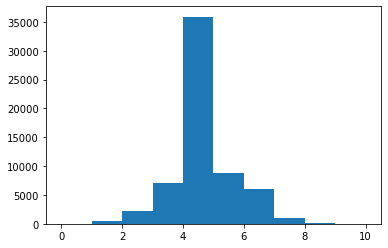

In [35]:
plt.hist(topic_content_df['level'])

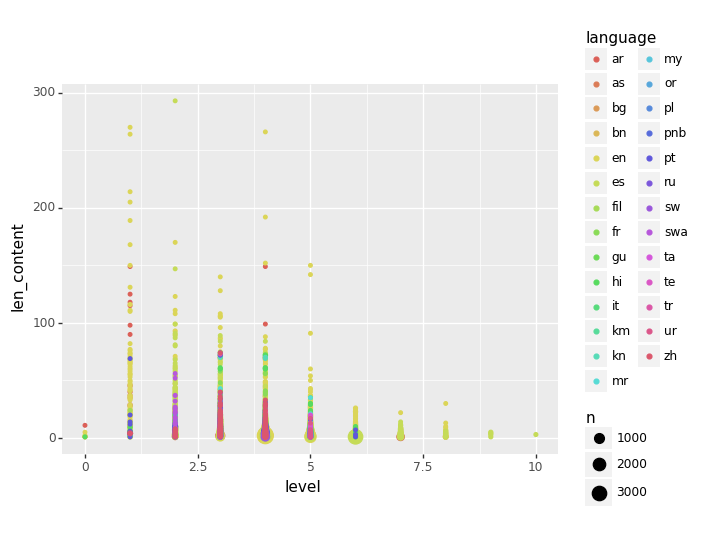

<ggplot: (8788629521083)>

In [42]:
ggplot(topic_content_df) + aes(x='level',y='len_content',color='language') + geom_count()

In [80]:
topic_content_df[topic_content_df['number_lg']==5]['content_desc_ls']

37247    [This learning video presents an introduction ...
54552    [This lesson is about the importance of fricti...
55858    [This Protein Purification video lesson is int...
Name: content_desc_ls, dtype: object

In [74]:
#topic_content_df['content_title_ls'] = topic_has_content_df22.apply(lambda x: x['content_title_ls'].replace("['",'').replace("']",'').split("', '"),axis=1)
#topic_content_df['content_desc_ls'] = topic_has_content_df22.apply(lambda x: x['content_desc_ls'].replace("['",'').replace("']",'').split("', '"),axis=1)


In [76]:
#topic_content_df.to_pickle('topic_content_df_master.df')

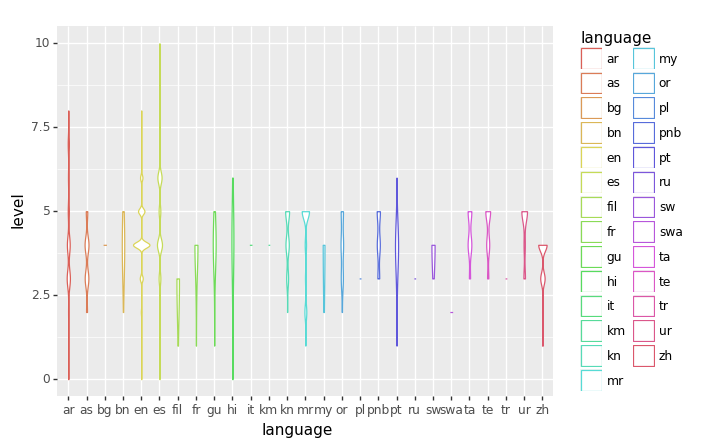

<ggplot: (8787619292239)>

In [82]:
ggplot(topic_content_df) + aes(x='language',y='level',color='language') + geom_violin()

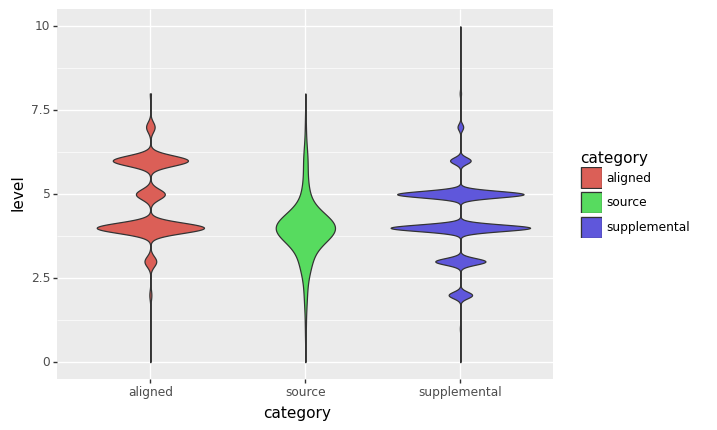

<ggplot: (8778960836919)>

In [47]:
ggplot(topic_content_df) + aes(x='category',y='level',fill='category') + geom_violin()

sns.scatterplot(x='day', y='tip', data=topic_content_df,
               hue='sex')

In [61]:
content_df

,id,title,description,kind,text,language,copyright_holder,license
0,c_00002381196d,"Sumar números de varios dígitos: 48,029+233,930","Suma 48,029+233,930 mediante el algoritmo está...",video,NaN,es,NaN,NaN
1,c_000087304a9e,Trovare i fattori di un numero,Sal trova i fattori di 120.\n\n,video,NaN,it,NaN,NaN
2,c_0000ad142ddb,Sumar curvas de demanda,Cómo añadir curvas de demanda\n\n,video,NaN,es,NaN,NaN
3,c_0000c03adc8d,Nado de aproximação,Neste vídeo você vai aprender o nado de aproxi...,document,\nNado de aproximação\nSaber nadar nas ondas ...,pt,Sikana Education,CC BY-NC-ND
4,c_00016694ea2a,geometry-m3-topic-a-overview.pdf,geometry-m3-topic-a-overview.pdf,document,Estándares Comunes del Estado de Nueva York\n\...,es,Engage NY,CC BY-NC-SA
...,...,...,...,...,...,...,...,...
154042,c_fffcbdd4de8b,2. 12: Diffusion,NaN,html5,What will eventually happen to these dyes?\n\n...,en,CSU and Merlot,CC BY-NC-SA
154043,c_fffe15a2d069,Sommare facendo gruppi da 10,Sal somma 5+68 spezzando il 5 in un 2 e un 3.\n\n,video,NaN,it,NaN,NaN
154044,c_fffed7b0d13a,Introdução à subtração,Sal fala sobre o que significa subtrair. Os ex...,video,NaN,pt,NaN,NaN
154045,c_ffff04ba7ac7,SA of a Cone,NaN,video,NaN,en,NaN,NaN


In [63]:
content_df['license'].value_counts()

CC BY-NC-SA      52088
CC BY-NC-ND       8714
CC BY             5927
CC BY-SA          4554
Public Domain     2044
CC BY-NC           691
CC BY-ND            17
Name: license, dtype: int64

In [99]:
content_df['copyright_holder'].value_counts()

Khan Academy                                                                                                                                                                               17034
CSU and Merlot                                                                                                                                                                             14729
Engage NY                                                                                                                                                                                   9819
Sikana Education                                                                                                                                                                            6804
Publicado por el Lic. Edelberto Andino(edelberto.andino.ea@gmail.com) para ser utilizado con fines educativos únicamente, no debe ser utilizado con fines lucrativos de ninguna índole.     4395
                                   

In [49]:
content_df['kind'].value_counts()

video       61487
document    33873
html5       32563
exercise    25925
audio         199
Name: kind, dtype: int64

In [39]:
# Aggregrate data count and group by and dont use as index
content_df_viz1 = content_df.groupby(['kind','license'],as_index=False).count()

In [48]:
#content_df_viz1

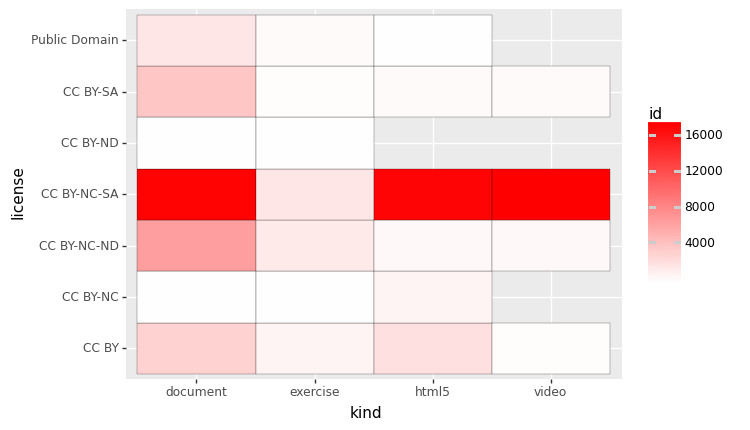

<ggplot: (8778960819932)>

In [46]:
ggplot(content_df_viz1) + aes(x='kind',y='license',fill='id') + geom_tile(color = "black") + scale_fill_gradient2(low = "green",high = "red") 



### -----------------------------------------------------------------------------------------------------------------------------

In [59]:
topic_content_df

,Unnamed: 0,id,title,description,channel,category,level,language,parent,has_content,topic_id,content_ids,content_ids_ls,len_content,content_title_ls,content_desc_ls,content_kind_ls,content_text_ls,content_lg_ls,content_ch_ls,content_license_ls,number_lg,content_kind_video,content_kind_document,content_kind_html5,content_kind_exercise,content_kind_audio
0,0,t_00004da3a1b2,Откриването на резисторите,"Изследване на материали, които предизвикват на...",000cf7,source,4,bg,t_16e29365b50d,True,t_00004da3a1b2,c_1108dd0c7a5d c_376c5a8eb028 c_5bc0e1e2cba0 c...,"[c_1108dd0c7a5d, c_376c5a8eb028, c_5bc0e1e2cba...",4.0,"[Молив като резистор, Да чуем променливото съп...","[Моливът причинява промяна в отклонението, под...","[video, video, video, video]","[nan, nan, nan, nan]","[bg, bg, bg, bg]","[nan, nan, nan, nan]","[nan, nan, nan, nan]",1,4,0,0,0,0
1,2,t_00068291e9a4,Entradas e saídas de uma função,Entenda um pouco mais sobre funções.,8e286a,source,4,pt,t_d14b6c2a2b70,True,t_00068291e9a4,c_639ea2ef9c95 c_89ce9367be10 c_ac1672cdcd2c c...,"[c_639ea2ef9c95, c_89ce9367be10, c_ac1672cdcd2...",4.0,"[Dados e resultados de funções: gráficos, Reso...",[Encontre todas as entradas que correspondem a...,"[exercise, video, video, exercise]","[nan, RKA, -, Agora, aqui, na, plataforma, da,...","[pt, pt, pt, pt]","[nan, Khan, Academy, Khan, Academy, nan]","[nan, CC, BY-NC-SA, CC, BY-NC-SA, nan]",1,2,0,0,2,0
2,3,t_00069b63a70a,Transcripts,NaN,6e3ba4,source,3,en,t_4054df11a74e,True,t_00069b63a70a,c_11a1dc0bfb99,[c_11a1dc0bfb99],1.0,[Flow Charts: Logical..: Written Transcript of...,"[Written Transcript of this video lesson, Engl...",[document],"[""Español\t\n, \xa0\nTítulo\t\n, \xa0de\t\n, \...",[en],"[MIT, Blossoms]","[CC, BY-NC-SA]",1,0,1,0,0,0
3,4,t_0006d41a73a8,Графики на експоненциални функции (Алгебра 2 н...,Научи повече за графиките на сложните показате...,000cf7,source,4,bg,t_e2452e21d252,True,t_0006d41a73a8,c_0c6473c3480d c_1c57a1316568 c_5e375cf14c47 c...,"[c_0c6473c3480d, c_1c57a1316568, c_5e375cf14c4...",5.0,"[Чертане на показателни финкции, Графики на по...","[Сал чертае y=-2*3ˣ+5, като използва интеракти...","[video, video, video, video, video]","[Казват, ни:, ""Използвай, интерактивната, граф...","[bg, bg, bg, bg, bg]","[Khan, Academy, Khan, Academy, Khan, Academy, ...","[CC, BY-NC-SA, CC, BY-NC-SA, CC, BY-NC-SA, nan...",1,5,0,0,0,0
4,5,t_0008768bdee6,100 સુધીનો સરવાળો,37 અને 49 જેવી બે-અંકની સંખ્યાઓ ઉમેરતા શીખો.,5223e0,supplemental,4,gu,t_0da7a331d666,True,t_0008768bdee6,c_34e1424229b4 c_7d1a964d66d5 c_aab93ee667f4,"[c_34e1424229b4, c_7d1a964d66d5, c_aab93ee667f4]",3.0,"[સમૂહ બનાવ્યા વિના 2-અંકની સંખ્યા ઉમેરવી 2, સમ...",[સલ સ્થાન કિંમત વિશે વિચારીને 23 + 45 ઉમેરે છે...,"[video, video, exercise]","[nan, &nbsp;મારી, પાસે, અહીં, બે, સંખ્યાઓ, છે....","[gu, gu, gu]","[nan, Khan, Academy, nan]","[nan, CC, BY-NC-SA, nan]",1,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61512,76965,t_fff830472691,Scalar Projections,NaN,fef095,source,4,en,t_c75d6acecf78,True,t_fff830472691,c_61fb63326e5d c_8f224e321c87,"[c_61fb63326e5d, c_8f224e321c87]",2.0,"[Scalar Projections, Scalar Projections Practice]","[[nan, nan]]","[html5, exercise]","[nan, nan]","[en, en]","[nan, nan]","[nan, nan]",1,0,0,1,1,0
61513,76966,t_fff9e5407d13,NA_U06 - El periódico,NaN,71fd51,supplemental,2,es,t_5bd8f6ae9f7d,True,t_fff9e5407d13,c_026db653a269 c_0fb048a6412c c_20de77522603 c...,"[c_026db653a269, c_0fb048a6412c, c_20de7752260...",10.0,"[La noticia, El periódico, Resumen: El periódi...","[[nan, nan, nan, nan, nan, nan, nan, nan, nan,...","[html5, html5, html5, html5, html5, html5, htm...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[es, es, es, es, es, es, es, es, es, es]","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",1,0,0,10,0,0
61514,76968,t_fffbe1d5d43c,Inscribed shapes problem solving,Use properties of inscribed angles to prove pr...,0c929

In [56]:
Counter(topic_content_df['content_kind_ls'].iloc[1])['exercise']

2

In [58]:
topic_content_df['content_kind_video'] = \
    topic_content_df.apply(lambda x: Counter(x['content_kind_ls'])['video'],axis=1)
topic_content_df['content_kind_document'] = \
    topic_content_df.apply(lambda x: Counter(x['content_kind_ls'])['document'],axis=1)
topic_content_df['content_kind_html5'] = \
    topic_content_df.apply(lambda x: Counter(x['content_kind_ls'])['html5'],axis=1)
topic_content_df['content_kind_exercise'] = \
    topic_content_df.apply(lambda x: Counter(x['content_kind_ls'])['exercise'],axis=1)
topic_content_df['content_kind_audio'] = \
    topic_content_df.apply(lambda x: Counter(x['content_kind_ls'])['audio'],axis=1)

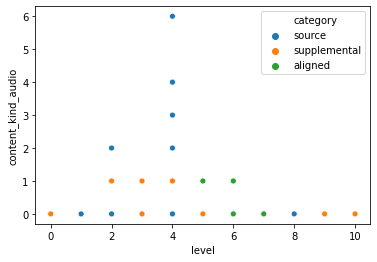

In [64]:
sns.scatterplot(x='level', y='content_kind_audio', data=topic_content_df, hue='category')

# Limitation : use only English Topic for train model ------------------

In [66]:
topic_df['language'].value_counts()/len(topic_df['language'])

en     0.469794
es     0.180715
pt     0.054266
fr     0.048082
ar     0.048082
bg     0.037247
sw     0.037156
gu     0.030141
bn     0.028270
hi     0.023203
it     0.011251
zh     0.011199
mr     0.003898
fil    0.003209
as     0.002170
my     0.001754
km     0.001572
kn     0.001546
te     0.001208
or     0.000909
ur     0.000857
ta     0.000780
pnb    0.000663
pl     0.000559
tr     0.000520
swa    0.000455
ru     0.000442
mul    0.000052
Name: language, dtype: float64

In [69]:
topic_df[topic_df['language']=='en']['has_content'].value_counts()

True     28053
False     8108
Name: has_content, dtype: int64

In [71]:
topic_df[topic_df['language']=='en']['has_content'].value_counts()/len(topic_df[topic_df['language']=='en']['has_content'])

True     0.775781
False    0.224219
Name: has_content, dtype: float64

In [70]:
topic_df['has_content'].value_counts()

True     61517
False    15455
Name: has_content, dtype: int64

In [72]:
topic_df['has_content'].value_counts()/len(topic_df['has_content'])

True     0.799213
False    0.200787
Name: has_content, dtype: float64

In [4]:
en_topic_content_df = topic_content_df[topic_content_df['language']=='en']

In [107]:
en_topic_content_df['number_lg'].value_counts()#/len(en_topic_content_df['number_lg']) * 100

# สัดส่วนของ การมี content ที่มีภาษาอื่นปนมาด้วย น้อยมากๆดังนั้นจะไม่นำมาคิด

1    27922
Name: number_lg, dtype: int64

In [80]:
en_topic_content_df

,Unnamed: 0,id,title,description,channel,category,level,language,parent,has_content,topic_id,content_ids,content_ids_ls,len_content,content_title_ls,content_desc_ls,content_kind_ls,content_text_ls,content_lg_ls,content_ch_ls,content_license_ls,number_lg,content_kind_video,content_kind_document,content_kind_html5,content_kind_exercise,content_kind_audio
2,3,t_00069b63a70a,Transcripts,NaN,6e3ba4,source,3,en,t_4054df11a74e,True,t_00069b63a70a,c_11a1dc0bfb99,[c_11a1dc0bfb99],1.0,[Flow Charts: Logical..: Written Transcript of...,"[Written Transcript of this video lesson, Engl...",[document],"[""Español\t\n, \xa0\nTítulo\t\n, \xa0de\t\n, \...",[en],"[MIT, Blossoms]","[CC, BY-NC-SA]",1,0,1,0,0,0
5,6,t_0008a1bd84ba,12. 20: Bird Reproduction,NaN,ebc86c,supplemental,5,en,t_c44ac9711007,True,t_0008a1bd84ba,c_7ff92a954a3d c_8790b074383e,"[c_7ff92a954a3d, c_8790b074383e]",2.0,"[12. 20: Bird Reproduction, Astounding Mating ...","[[nan, 'The Birds of Paradise from BBC\'s outs...","[html5, video]","[""Is, this, pair, of, birds, actually, a, “cou...","[en, en]","[CSU, and, Merlot, nan]","[CC, BY-NC-SA, nan]",1,1,0,1,0,0
6,8,t_000d1fb3f2f5,2.1.2 - Logarithms,NaN,e77b55,aligned,5,en,t_b897d168db90,True,t_000d1fb3f2f5,c_07f1d0eec4b2 c_15a6fb858696 c_175e9db3fc44 c...,"[c_07f1d0eec4b2, c_15a6fb858696, c_175e9db3fc4...",26.0,"[Proof of the logarithm change of base rule, I...",[Sal proves the logarithmic change of base rul...,"[video, video, exercise, video, video, video, ...","[""What, I, want, to, do, in, this, video, is, ...","[en, en, en, en, en, en, en, en, en, en, en, e...","[Khan, Academy, Khan, Academy, nan, Khan, Acad...","[CC, BY-NC-SA, CC, BY-NC-SA, nan, CC, BY-NC-SA...",1,18,0,0,8,0
8,10,t_00102869fbcb,Triangles and polygons,Learning outcomes: students must be able to so...,a91e32,aligned,3,en,t_039cecc12bb8,True,t_00102869fbcb,c_005e793bd0c5 c_066737fa5146 c_08b2070f92e0 c...,"[c_005e793bd0c5, c_066737fa5146, c_08b2070f92e...",87.0,"[Regular and Irregular Polygons, Classifying t...","[[nan, 'A triangle is a closed figure consisti...","[html5, document, video, document, exercise, v...","[nan, Classifying, triangles, based, on, its, ...","[en, en, en, en, en, en, en, en, en, en, en, e...","[nan, MOE, Malawi, COVID19, Support, Group, Kh...","[nan, CC, BY-SA, CC, BY-NC-SA, CC, BY-SA, nan,...",1,32,18,16,21,0
10,13,t_0012a45fa09c,Quiz: materials and techniques,NaN,2ee29d,aligned,4,en,t_6957d4a9f469,True,t_0012a45fa09c,c_dde078b8ea7a,[c_dde078b8ea7a],1.0,[Materials and techniques (quiz)],[Test your comprehension of the different medi...,[exercise],[nan],[en],[nan],[nan],1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61504,76956,t_fff05585df72,11: Systems of Equations and Inequalities,NaN,1fb613,supplemental,4,en,t_5ab3d2eac617,True,t_fff05585df72,c_6f255c97f381 c_743e6319d5ae c_88bc7ee86c8b c...,"[c_6f255c97f381, c_743e6319d5ae, c_88bc7ee86c8...",9.0,"[11.5: Partial Fractions', ""11.9: Solving Syst...","[[nan, nan, nan, nan, nan, nan, nan, nan, nan]]","[html5, html5, html5, html5, html5, html5, htm...","[Skills, to, Develop\n\nDecompose, \\(\\dfrac{...","[en, en, en, en, en, en, en, en, en]","[CSU, and, Merlot, CSU, and, Merlot, CSU, and,...","[CC, BY-NC-SA, CC, BY-NC-SA, CC, BY-NC-SA, CC,...",1,0,0,9,0,0
61507,76959,t_fff51448598c,Comparative advantage and the gains from trade,Comparative advantage is the ability to produc...,2ee29d,aligned,4,en,t_9d906e167aea,True,t_fff51448598c,c_054e15d2ff3f c_113437812aa0 c_9c817a2bcb3c c...,"[c_054e15d2ff3f, c_113437812aa0, c_9c817a2bcb3...",8.0,"[Comparative advantage, specialization, and ga...",[When two agents have differing opportunity co...,"[video, video, video, video, video, exercise, ...","[""Lets, now, move, away, from, the, world, of,...","[en, en, en, en, en, en, en, en]","[Khan, Academy, Khan, Academy, Khan, Academy, ...","[CC, BY-NC-SA, CC, BY-NC-SA, CC, BY-NC-SA, CC,...",1,7,0,0,1,0
61509,76961,t_fff5da49c4d3,Busi

In [93]:
en_topic_content_df[['title','content_title_ls','content_desc_ls']].iloc[-3]

title                                                Business Writing
content_title_ls    [Vegetarian Lunch Options at Bay High (Email),...
content_desc_ls                                          [[nan, nan]]
Name: 61509, dtype: object

In [94]:
en_topic_content_df['title'].iloc[-3]

'Business Writing'

In [95]:
en_topic_content_df['content_title_ls'].iloc[-3]

['Vegetarian Lunch Options at Bay High (Email)',
 'Mid-Project Report on History Paper (Email)']

In [96]:
en_topic_content_df['content_desc_ls'].iloc[-3]

['[nan, nan]']

In [5]:
en_topic_content_prep = en_topic_content_df

In [6]:
len(en_topic_content_prep)

28053

# Prepare to train model

In [7]:
en_topic_content_prep.drop(en_topic_content_prep.index[en_topic_content_prep['number_lg']>=2], axis=0, inplace=True)

/Users/pimawatmingkwan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [8]:
en_topic_title = en_topic_content_prep[['id','title']]

In [9]:
en_topic_title['type'] = 'topic'

<ipython-input-9-abef3024debf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [10]:
en_topic_title

,id,title,type
2,t_00069b63a70a,Transcripts,topic
5,t_0008a1bd84ba,12. 20: Bird Reproduction,topic
6,t_000d1fb3f2f5,2.1.2 - Logarithms,topic
8,t_00102869fbcb,Triangles and polygons,topic
10,t_0012a45fa09c,Quiz: materials and techniques,topic
...,...,...,...
61504,t_fff05585df72,11: Systems of Equations and Inequalities,topic
61507,t_fff51448598c,Comparative advantage and the gains from trade,topic
61509,t_fff5da49c4d3,Business Writing,topic
61510,t_fff7782561f4,Introduction,topic


In [11]:
en_content_title = content_df[content_df['language']=='en'][['id','title']]

In [12]:
en_content_title['type'] = 'content'

In [13]:
pd.set_option('display.max_rows', 1000)

In [14]:
en_content_title

,id,title,type
5,c_00019840d110,5.12E: Regulation of the Calvin Cycle,content
8,c_00027d03ca7d,4.E: Genomes and Chromosomes (Exercises),content
10,c_000425df0161,9.3: Van Der Waals Forces between Atoms,content
11,c_00046806ad8a,Compare multi-digit numbers,content
18,c_000751f58836,Tangents of circles problem (example 2),content
...,...,...,...
154035,c_fffa90b024e3,Congruent Triangle Proof Example,content
154041,c_fffbfc3d60c6,number_lines_mixed_positive_student writes num...,content
154042,c_fffcbdd4de8b,2. 12: Diffusion,content
154045,c_ffff04ba7ac7,SA of a Cone,content


In [15]:
en_topic_content_title = pd.concat([en_topic_title,en_content_title],axis = 0)

In [16]:
en_topic_content_title['title2'] = en_topic_content_title['title'].str.lower()

In [17]:
#en_topic_content_title['title2'].replace('','')

# I use Content base for solving this recommender system

In [18]:
en_topic_content_title['title2']

2                                               transcripts
5                                 12. 20: bird reproduction
6                                        2.1.2 - logarithms
8                                    triangles and polygons
10                           quiz: materials and techniques
                                ...                        
154035                     congruent triangle proof example
154041    number_lines_mixed_positive_student writes num...
154042                                     2. 12: diffusion
154045                                         sa of a cone
154046                                             the jats
Name: title2, Length: 93861, dtype: object

In [19]:
#remove number and other sign by using replace with regular expression

en_topic_content_title['title2'].str.replace('[^a-z\s]', '')

2                                           transcripts
5                                     bird reproduction
6                                            logarithms
8                                triangles and polygons
10                        quiz materials and techniques
                              ...                      
154035                 congruent triangle proof example
154041    numberlinesmixedpositivestudent writes number
154042                                        diffusion
154045                                     sa of a cone
154046                                         the jats
Name: title2, Length: 93861, dtype: object

In [20]:
en_topic_content_title['title3'] = en_topic_content_title['title2'].str.replace('[^a-z\s]', '')

In [21]:
en_topic_content_title[['title3']].stack()

#convert df to series

2       title3                                      transcripts
5       title3                                bird reproduction
6       title3                                       logarithms
8       title3                           triangles and polygons
10      title3                    quiz materials and techniques
                                      ...                      
154035  title3                 congruent triangle proof example
154041  title3    numberlinesmixedpositivestudent writes number
154042  title3                                        diffusion
154045  title3                                     sa of a cone
154046  title3                                         the jats
Length: 93860, dtype: object

In [21]:
en_topic_content_title2 = en_topic_content_title.iloc[:70000]

In [22]:
en_topic_content_title2

,id,title,type,title2,title3
2,t_00069b63a70a,Transcripts,topic,transcripts,transcripts
5,t_0008a1bd84ba,12. 20: Bird Reproduction,topic,12. 20: bird reproduction,bird reproduction
6,t_000d1fb3f2f5,2.1.2 - Logarithms,topic,2.1.2 - logarithms,logarithms
8,t_00102869fbcb,Triangles and polygons,topic,triangles and polygons,triangles and polygons
10,t_0012a45fa09c,Quiz: materials and techniques,topic,quiz: materials and techniques,quiz materials and techniques
...,...,...,...,...,...
98134,c_a2f21d63d705,Challenge Set: Area of a trapezium,content,challenge set: area of a trapezium,challenge set area of a trapezium
98137,c_a2f49a0f6827,Summary: Units of time and money,content,summary: units of time and money,summary units of time and money
98138,c_a2f4c638e991,Testing solutions to inequalities,content,testing solutions to inequalities,testing solutions to inequalities
98140,c_a2f63e68400e,Digital Literacy - Lesson Plan,content,digital literacy - lesson plan,digital literacy lesson plan


# Train model

In [31]:
#vectorizer = CountVectorizer()
#vectorized = vectorizer.fit_transform(en_topic_content_title['title3'].values)

In [32]:
vectorizer = CountVectorizer()
vectorized = vectorizer.fit_transform(en_topic_content_title2[['title3']].stack())

In [33]:
vectorized

<49999x14704 sparse matrix of type '<class 'numpy.int64'>'
	with 197183 stored elements in Compressed Sparse Row format>

In [34]:
#Dead Kernel
similarities = cosine_similarity(vectorized)

# Practice -------------------------------------------------------------------------

In [22]:
en_topic_title_f = topic_df[topic_df['has_content']==False][topic_df['language']=='en'][['id','title']]

<ipython-input-22-4c2891c7ab2d>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [23]:
en_topic_title_f['type'] = 'topic'

In [24]:
en_topic_title_f

,id,title,type
1,t_000095e03056,Unit 3.3 Enlargements and Similarities,topic
7,t_000c0c854f0b,Nepal,topic
12,t_001139e52dbe,Addition and Subtraction to 20,topic
15,t_001477394250,Part II - Computational Thinking - Advanced,topic
20,t_00165488ad43,Significance tests (hypothesis testing),topic
...,...,...,...
76946,t_ffe63e436874,Orientation to the school,topic
76950,t_ffe9f9b46542,Vocabulary,topic
76964,t_fff80f4eee89,Polynomial division,topic
76967,t_fffb0bf2801d,4.3 Graph of functions,topic


In [25]:
en_content_title

,id,title,type
5,c_00019840d110,5.12E: Regulation of the Calvin Cycle,content
8,c_00027d03ca7d,4.E: Genomes and Chromosomes (Exercises),content
10,c_000425df0161,9.3: Van Der Waals Forces between Atoms,content
11,c_00046806ad8a,Compare multi-digit numbers,content
18,c_000751f58836,Tangents of circles problem (example 2),content
...,...,...,...
154035,c_fffa90b024e3,Congruent Triangle Proof Example,content
154041,c_fffbfc3d60c6,number_lines_mixed_positive_student writes num...,content
154042,c_fffcbdd4de8b,2. 12: Diffusion,content
154045,c_ffff04ba7ac7,SA of a Cone,content


In [26]:
en_topic_f_content_title = pd.concat([en_topic_title_f,en_content_title],axis = 0)

In [27]:
en_topic_f_content_title['title2'] = en_topic_f_content_title['title'].str.lower()

In [29]:
en_topic_f_content_title['title3'] = en_topic_f_content_title['title2'].str.replace('[^a-z\s]', '')

In [30]:
en_topic_f_content_title2 = en_topic_f_content_title.iloc[:50000]

In [31]:
en_topic_f_content_title2[['title3']].stack()

1      title3           unit  enlargements and similarities
7      title3                                         nepal
12     title3                  addition and subtraction to 
15     title3     part ii  computational thinking  advanced
20     title3         significance tests hypothesis testing
                                    ...                    
97699  title3    absolute value as distance between numbers
97700  title3    why arent all atomic masses whole numbers 
97702  title3              classes of transposable elements
97704  title3                              poetry by chance
97706  title3                               python examples
Length: 50000, dtype: object

In [32]:
vectorizer = CountVectorizer()
vectorized = vectorizer.fit_transform(en_topic_f_content_title2[['title3']].stack())

In [33]:
similarities = cosine_similarity(vectorized)

In [34]:
len(vectorizer.get_feature_names())

17974

In [35]:
print(similarities)

[[1.   0.   0.25 ... 0.   0.   0.  ]
 [0.   1.   0.   ... 0.   0.   0.  ]
 [0.25 0.   1.   ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 1.   0.   0.  ]
 [0.   0.   0.   ... 0.   1.   0.  ]
 [0.   0.   0.   ... 0.   0.   1.  ]]


In [36]:
df = pd.DataFrame(similarities, columns=en_topic_f_content_title2['id'], index=en_topic_f_content_title2['id']).reset_index()

df.head()

id,id,t_000095e03056,t_000c0c854f0b,t_001139e52dbe,t_001477394250,t_00165488ad43,t_00181801a645,t_00250c0c6e1a,t_00349858758d,t_003b7d9295f2,...,c_a238a94f3b09,c_a23a136a18d1,c_a23a2fe6041e,c_a23a47fd1804,c_a23b59b209f5,c_a23bba6dc226,c_a23becba2f5f,c_a23c3f979f0f,c_a23cf149e951,c_a23d29606eef
0,t_000095e03056,1.00,0.0,0.25,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.288675,0.0,0.0,0.223607,0.0,0.0,0.0,0.0,0.0,0.0
1,t_000c0c854f0b,0.00,1.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,t_001139e52dbe,0.25,0.0,1.00,0.0,0.0,0.0,0.288675,0.0,0.0,...,0.288675,0.0,0.0,0.223607,0.0,0.0,0.0,0.0,0.0,0.0
3,t_001477394250,0.00,0.0,0.00,1.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,t_00165488ad43,0.00,0.0,0.00,0.0,1.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
df.columns[[range(8109,50001)]]

Index(['c_00019840d110', 'c_00027d03ca7d', 'c_000425df0161', 'c_00046806ad8a',
       'c_000751f58836', 'c_000d74f1649c', 'c_000f7fcdaacc', 'c_001079f7f98f',
       'c_00146fbae996', 'c_0015ec25d41e',
       ...
       'c_a238a94f3b09', 'c_a23a136a18d1', 'c_a23a2fe6041e', 'c_a23a47fd1804',
       'c_a23b59b209f5', 'c_a23bba6dc226', 'c_a23becba2f5f', 'c_a23c3f979f0f',
       'c_a23cf149e951', 'c_a23d29606eef'],
      dtype='object', name='id', length=41892)

In [ ]:
#df2 = df.drop(df.columns[[range(1,8109)]], axis=1)

In [36]:
#df_topic = df.iloc[:8108]

In [40]:
#df_topic

In [ ]:
#df.iloc[:8108,8109:]

In [ ]:
#df2

In [38]:
df.to_csv('df_similar.csv')

In [43]:
df_topic = df.iloc[:8108]

In [44]:
df_topic.drop(df_topic.columns[[range(1,8109)]], axis=1)

id,id,c_00019840d110,c_00027d03ca7d,c_000425df0161,c_00046806ad8a,c_000751f58836,c_000d74f1649c,c_000f7fcdaacc,c_001079f7f98f,c_00146fbae996,...,c_a238a94f3b09,c_a23a136a18d1,c_a23a2fe6041e,c_a23a47fd1804,c_a23b59b209f5,c_a23bba6dc226,c_a23becba2f5f,c_a23c3f979f0f,c_a23cf149e951,c_a23d29606eef
0,t_000095e03056,0.000000,0.250000,0.0,0.0,0.000000,0.0,0.0,0.176777,0.0,...,0.288675,0.0,0.0,0.223607,0.0,0.0,0.0,0.000000,0.0,0.0
1,t_000c0c854f0b,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
2,t_001139e52dbe,0.000000,0.250000,0.0,0.0,0.000000,0.0,0.0,0.176777,0.0,...,0.288675,0.0,0.0,0.223607,0.0,0.0,0.0,0.000000,0.0,0.0
3,t_001477394250,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
4,t_00165488ad43,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8103,t_ffe63e436874,0.223607,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
8104,t_ffe9f9b46542,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
8105,t_fff80f4eee89,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
8106,t_fffb0bf2801d,0.258199,0.000000,0.0,0.0,0.258199,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.288675,0.0,0.0


In [46]:
df_similarity = df_topic.drop(df_topic.columns[[range(1,8109)]], axis=1)

In [47]:
df_similarity.to_csv('df_similar2.csv')

In [48]:
df_similarity

id,id,c_00019840d110,c_00027d03ca7d,c_000425df0161,c_00046806ad8a,c_000751f58836,c_000d74f1649c,c_000f7fcdaacc,c_001079f7f98f,c_00146fbae996,...,c_a238a94f3b09,c_a23a136a18d1,c_a23a2fe6041e,c_a23a47fd1804,c_a23b59b209f5,c_a23bba6dc226,c_a23becba2f5f,c_a23c3f979f0f,c_a23cf149e951,c_a23d29606eef
0,t_000095e03056,0.000000,0.250000,0.0,0.0,0.000000,0.0,0.0,0.176777,0.0,...,0.288675,0.0,0.0,0.223607,0.0,0.0,0.0,0.000000,0.0,0.0
1,t_000c0c854f0b,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
2,t_001139e52dbe,0.000000,0.250000,0.0,0.0,0.000000,0.0,0.0,0.176777,0.0,...,0.288675,0.0,0.0,0.223607,0.0,0.0,0.0,0.000000,0.0,0.0
3,t_001477394250,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
4,t_00165488ad43,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8103,t_ffe63e436874,0.223607,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
8104,t_ffe9f9b46542,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
8105,t_fff80f4eee89,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
8106,t_fffb0bf2801d,0.258199,0.000000,0.0,0.0,0.258199,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.288675,0.0,0.0


# Input data and get result

In [3]:
similarity_df = pd.read_csv('df_similar2.csv')

In [4]:
similarity_df

,Unnamed: 0,id,c_00019840d110,c_00027d03ca7d,c_000425df0161,c_00046806ad8a,c_000751f58836,c_000d74f1649c,c_000f7fcdaacc,c_001079f7f98f,...,c_a238a94f3b09,c_a23a136a18d1,c_a23a2fe6041e,c_a23a47fd1804,c_a23b59b209f5,c_a23bba6dc226,c_a23becba2f5f,c_a23c3f979f0f,c_a23cf149e951,c_a23d29606eef
0,0,t_000095e03056,0.000000,0.250000,0.0,0.0,0.000000,0.0,0.0,0.176777,...,0.288675,0.0,0.0,0.223607,0.0,0.0,0.0,0.000000,0.0,0.0
1,1,t_000c0c854f0b,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
2,2,t_001139e52dbe,0.000000,0.250000,0.0,0.0,0.000000,0.0,0.0,0.176777,...,0.288675,0.0,0.0,0.223607,0.0,0.0,0.0,0.000000,0.0,0.0
3,3,t_001477394250,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
4,4,t_00165488ad43,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8103,8103,t_ffe63e436874,0.223607,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
8104,8104,t_ffe9f9b46542,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
8105,8105,t_fff80f4eee89,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
8106,8106,t_fffb0bf2801d,0.258199,0.000000,0.0,0.0,0.258199,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.288675,0.0,0.0


In [5]:
similarity_df_transpose = similarity_df.T
similarity_df_transpose

,0,1,2,3,4,5,6,7,8,9,...,8098,8099,8100,8101,8102,8103,8104,8105,8106,8107
Unnamed: 0,0,1,2,3,4,5,6,7,8,9,...,8098,8099,8100,8101,8102,8103,8104,8105,8106,8107
id,t_000095e03056,t_000c0c854f0b,t_001139e52dbe,t_001477394250,t_00165488ad43,t_00181801a645,t_00250c0c6e1a,t_00349858758d,t_003b7d9295f2,t_0048d860a6ed,...,t_ffba23c16027,t_ffba31153427,t_ffbc43fb421a,t_ffd79d05a5d8,t_ffdf7dfd64fc,t_ffe63e436874,t_ffe9f9b46542,t_fff80f4eee89,t_fffb0bf2801d,t_fffe88835149
c_00019840d110,0,0,0,0,0,0,0,0,0,0.2,...,0,0,0,0,0,0.223607,0,0,0.258199,0.141421
c_00027d03ca7d,0.25,0,0.25,0,0,0,0,0,0,0,...,0,0,0,0.25,0,0,0,0,0,0.316228
c_000425df0161,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c_a23bba6dc226,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
c_a23becba2f5f,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
c_a23c3f979f0f,0,0,0,0,0,0,0,0,0,0.223607,...,0,0,0,0,0,0,0,0,0.288675,0.158114
c_a23cf149e951,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
similarity_df_transpose['content_id'] = similarity_df_transpose.index

In [7]:
similarity_df_transpose

,0,1,2,3,4,5,6,7,8,9,...,8099,8100,8101,8102,8103,8104,8105,8106,8107,content_id
Unnamed: 0,0,1,2,3,4,5,6,7,8,9,...,8099,8100,8101,8102,8103,8104,8105,8106,8107,Unnamed: 0
id,t_000095e03056,t_000c0c854f0b,t_001139e52dbe,t_001477394250,t_00165488ad43,t_00181801a645,t_00250c0c6e1a,t_00349858758d,t_003b7d9295f2,t_0048d860a6ed,...,t_ffba31153427,t_ffbc43fb421a,t_ffd79d05a5d8,t_ffdf7dfd64fc,t_ffe63e436874,t_ffe9f9b46542,t_fff80f4eee89,t_fffb0bf2801d,t_fffe88835149,id
c_00019840d110,0,0,0,0,0,0,0,0,0,0.2,...,0,0,0,0,0.223607,0,0,0.258199,0.141421,c_00019840d110
c_00027d03ca7d,0.25,0,0.25,0,0,0,0,0,0,0,...,0,0,0.25,0,0,0,0,0,0.316228,c_00027d03ca7d
c_000425df0161,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,c_000425df0161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c_a23bba6dc226,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,c_a23bba6dc226
c_a23becba2f5f,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,c_a23becba2f5f
c_a23c3f979f0f,0,0,0,0,0,0,0,0,0,0.223607,...,0,0,0,0,0,0,0,0.288675,0.158114,c_a23c3f979f0f
c_a23cf149e951,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,c_a23cf149e951


In [10]:
similarity_df_transpose.columns = similarity_df_transpose.iloc[1]

In [13]:
similarity_df_transpose2 = similarity_df_transpose.iloc[2:]

In [14]:
#similarity_df_transpose2.to_csv('similarity_df_transpose2.csv')

In [15]:
similarity_df_transpose2

id,t_000095e03056,t_000c0c854f0b,t_001139e52dbe,t_001477394250,t_00165488ad43,t_00181801a645,t_00250c0c6e1a,t_00349858758d,t_003b7d9295f2,t_0048d860a6ed,...,t_ffba31153427,t_ffbc43fb421a,t_ffd79d05a5d8,t_ffdf7dfd64fc,t_ffe63e436874,t_ffe9f9b46542,t_fff80f4eee89,t_fffb0bf2801d,t_fffe88835149,id
c_00019840d110,0,0,0,0,0,0,0,0,0,0.2,...,0,0,0,0,0.223607,0,0,0.258199,0.141421,c_00019840d110
c_00027d03ca7d,0.25,0,0.25,0,0,0,0,0,0,0,...,0,0,0.25,0,0,0,0,0,0.316228,c_00027d03ca7d
c_000425df0161,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,c_000425df0161
c_00046806ad8a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,c_00046806ad8a
c_000751f58836,0,0,0,0,0,0,0,0,0,0.2,...,0,0,0,0,0,0,0,0.258199,0.141421,c_000751f58836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c_a23bba6dc226,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,c_a23bba6dc226
c_a23becba2f5f,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,c_a23becba2f5f
c_a23c3f979f0f,0,0,0,0,0,0,0,0,0,0.223607,...,0,0,0,0,0,0,0,0.288675,0.158114,c_a23c3f979f0f
c_a23cf149e951,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,c_a23cf149e951


In [32]:
similarity_df_transpose2[x].iloc[1]

0.25

In [35]:
similarity_df_transpose2 = similarity_df_transpose2.iloc[:,:-1].astype(float)

#.nlargest(11,x)['id']

In [36]:
#similarity_df_transpose2.to_csv('similarity_df_transpose3.csv')

In [64]:
correlations_df[correlations_df['topic_id']=='t_001139e52dbe']

,topic_id,content_ids


In [59]:
similarity_df_transpose2.nlargest(21,'t_001139e52dbe')['t_001139e52dbe']

c_1b6c60410c3c    0.750000
c_1c2dc382b381    0.750000
c_04f46881d23a    0.707107
c_1e4036983108    0.707107
c_0137f93cf5e3    0.670820
c_0b2831f2b638    0.670820
c_1c12f0547908    0.670820
c_3bb6213983ff    0.670820
c_3fd24546cbf5    0.670820
c_4684584349b7    0.670820
c_502ce5e9bb8b    0.670820
c_66561d043112    0.670820
c_9fbde0fd6341    0.670820
c_9269a9f66763    0.666667
c_12bd2fe59253    0.632456
c_8ea2366437d9    0.632456
c_9cdfcc56dc24    0.632456
c_07293dc5214e    0.612372
c_103387e4de31    0.612372
c_1a612da896b3    0.612372
c_1b9f3b75ab42    0.612372
Name: t_001139e52dbe, dtype: float64

In [60]:
topic_df[topic_df['id']=='t_001139e52dbe']

,id,title,description,channel,category,level,language,parent,has_content
12,t_001139e52dbe,Addition and Subtraction to 20,NaN,fef095,source,5,en,t_f078c5cdba92,False


In [65]:
content_df[(content_df['id']=='c_1b6c60410c3c') | (content_df['id']=='c_1c2dc382b381') | 
           (content_df['id']=='c_04f46881d23a') | (content_df['id']=='c_1e4036983108') | 
           (content_df['id']=='c_0137f93cf5e3') | (content_df['id']=='c_0b2831f2b638') |
           (content_df['id']=='c_07293dc5214e') | (content_df['id']=='c_1a612da896b3')]

,id,title,description,kind,text,language,copyright_holder,license
705,c_0137f93cf5e3,Two-step Addition and Subtraction Practice,NaN,exercise,NaN,en,NaN,NaN
2915,c_04f46881d23a,More and Less (Addition and Subtraction),NaN,video,NaN,en,NaN,NaN
4245,c_07293dc5214e,Level 3 : Addition and subtraction word problems,NaN,exercise,NaN,en,NaN,NaN
6637,c_0b2831f2b638,Level 1 : Mixed addition and subtraction,NaN,exercise,NaN,en,NaN,NaN
15831,c_1a612da896b3,Addition and Subtraction of two Integers,NaN,video,NaN,en,NaN,NaN
16473,c_1b6c60410c3c,Addition and subtraction within 10,Sal solves addition and subtraction problems w...,video,- [Voiceover] So we're given four different eq...,en,Khan Academy,CC BY-NC-SA
16948,c_1c2dc382b381,Relating addition and subtraction,"Sal shows the relationship between 2+3=5, 5-2=...",video,I have two green balls and three purple balls ...,en,Khan Academy,CC BY-NC-SA
18149,c_1e4036983108,Comparing with Two-step Addition and Subtracti...,NaN,video,NaN,en,NaN,NaN


In [55]:
similarity_df_transpose2.nlargest(31,'t_0048d860a6ed')['t_0048d860a6ed']

c_0c9c21e762ae    0.632456
c_44518d017332    0.632456
c_58fcc004d6dc    0.632456
c_2ab445d908ae    0.600000
c_1cb18c495047    0.547723
c_1d42ac678bb4    0.547723
c_20767f5eeb17    0.547723
c_263bcf468dd1    0.547723
c_34c7036f880e    0.547723
c_389055981fd2    0.547723
c_3b9d5742a40b    0.547723
c_3e51925a6e6a    0.547723
c_51ba58307eda    0.547723
c_58da3ec1866e    0.547723
c_5e73e576b39e    0.547723
c_787ff0143863    0.547723
c_91e4196b2434    0.547723
c_94b768b7c345    0.547723
c_9f0bd334e615    0.547723
c_69a604a3140e    0.516398
c_0eca5da7c5c6    0.474342
c_0dee5c59367d    0.447214
c_1fcfd2ba851f    0.447214
c_2d6088d318f9    0.447214
c_31db7db0025a    0.447214
c_45059fd419d4    0.447214
c_534c296a59e5    0.447214
c_55b5de30dde7    0.447214
c_8242e4db4b88    0.447214
c_8591bd864174    0.447214
c_8e7f6949f742    0.447214
Name: t_0048d860a6ed, dtype: float64

In [56]:
topic_df[topic_df['id']=='t_0048d860a6ed']

,id,title,description,channel,category,level,language,parent,has_content
76,t_0048d860a6ed,Some basic concepts of chemistry,Chemistry is the study of matter and the chang...,2ee29d,aligned,3,en,t_4831ad66d5ee,False


In [57]:
content_df[(content_df['id']=='c_0c9c21e762ae') | (content_df['id']=='c_44518d017332') | (content_df['id']=='c_58fcc004d6dc')]

,id,title,description,kind,text,language,copyright_holder,license
7548,c_0c9c21e762ae,12.1: Basic Concepts,NaN,html5,The moment distribution method of analysis of ...,en,CSU and Merlot,CC BY-NC-SA
41193,c_44518d017332,3.1: Basic Concepts,NaN,html5,A set is a collection of elements. A set is de...,en,CSU and Merlot,CC BY-NC-SA
53633,c_58fcc004d6dc,3.2: Basic Concepts,NaN,html5,Basic Concepts\n\nA \( \textcolor{blue}{\mbox{...,en,CSU and Merlot,CC BY-NC-SA


In [58]:
content_df[(content_df['id']=='c_2ab445d908ae') | (content_df['id']=='c_1cb18c495047') | (content_df['id']=='c_1d42ac678bb4')]

,id,title,description,kind,text,language,copyright_holder,license
17237,c_1cb18c495047,1.3: Some Applications of Basic Counting Princ...,NaN,document,"Hint for Problem 50-c\nIn each part, each such...",en,CSU and Merlot,CC BY-NC-SA
17549,c_1d42ac678bb4,1.3: Some Applications of Basic Counting Princ...,NaN,document,Hint for Problem 64\nYou may choose a specific...,en,CSU and Merlot,CC BY-NC-SA
25748,c_2ab445d908ae,5.E: Basic Concepts of Probability (Exercises),NaN,html5,Exercise \(\PageIndex{1}\): Counting\n\nA typi...,en,CSU and Merlot,CC BY-NC-SA
